In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [5]:
mainpath= "d:/python-ml-course-master/datasets"
filename= "ecom-expense/Ecom Expense.csv"
fullpath =os.path.join(mainpath, filename)
df = pd.read_csv(fullpath)
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [6]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix= "City") 

In [7]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [8]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [9]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [10]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [11]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [12]:
features_cols = ["Monthly Income", "Transaction Time", "Gender_Female", "Gender_Male", "City_Tier 1", "City_Tier 2", "City_Tier 3"]

In [13]:
x = df_new[features_cols]
y = df_new["Total Spend"]

In [14]:
lm = LinearRegression()
lm.fit(x,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
lm.intercept_, lm.coef_

(3655.7294076906564,
 array([   0.15297825,    0.12372609,  -94.15779883,   94.15779883,
         119.6632516 ,  -16.67901801, -102.9842336 ]))

In [16]:
list(zip(features_cols, lm.coef_))

[('Monthly Income', 0.15297824609320496),
 ('Transaction Time', 0.12372608642619928),
 ('Gender_Female', -94.15779883031988),
 ('Gender_Male', 94.15779883031993),
 ('City_Tier 1', 119.66325160390109),
 ('City_Tier 2', -16.679018007990035),
 ('City_Tier 3', -102.984233595911)]

In [17]:
lm.score(x,y)

0.19478920552885381

## Añadir otra columna 


In [18]:
features_cols = ["Monthly Income", "Transaction Time", "Gender_Female", "Gender_Male", "City_Tier 1", "City_Tier 2", "City_Tier 3", "Record", "Age "]

In [19]:
x = df_new[features_cols]
y = df_new["Total Spend"]

In [20]:
lm = LinearRegression()
lm.fit(x,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
lm.intercept_, lm.coef_

(-335.7380017453761,
 array([ 1.47442269e-01,  1.56391583e-01, -1.33088707e+02,  1.33088707e+02,
         7.83785050e+01,  5.20259633e+01, -1.30404468e+02,  7.72149205e+02,
         6.42429817e+00]))

In [22]:
list(zip(features_cols, lm.coef_))

[('Monthly Income', 0.1474422689744857),
 ('Transaction Time', 0.1563915830636624),
 ('Gender_Female', -133.08870663170518),
 ('Gender_Male', 133.08870663170535),
 ('City_Tier 1', 78.37850497640348),
 ('City_Tier 2', 52.0259633443191),
 ('City_Tier 3', -130.4044683207225),
 ('Record', 772.1492053631356),
 ('Age ', 6.424298167613064)]

In [23]:
lm.score(x,y)

0.9187458997709432

EL modelo puede ser escrito como:

* Total_Spend = -335.7380017453761 + Monthly Income * 0.1474422689744857 + Transaction Time * 0.1563915830636624 + Gender_Female * -133.08870663170518 + Gender_Male * 133.08870663170535 + City_Tier 1 * 78.37850497640348 + City_Tier 2 * 52.0259633443191 + City_Tier 3 * -130.4044683207225 + Record * 772.1492053631356 + Age * 6.424298167613064

    * Si es hombre y vive en CT1: -335.7380017453761 + Monthly Income * 0.1474422689744857 + Transaction Time * 0.1563915830636624 + 133.08870663170535 + 78.37850497640348 + Record * 772.1492053631356 + Age * 6.424298167613064
    
* Se Genera 6 modelos Difentes dependiendo de las condiciones de genero y ciudad.


In [24]:
df_new["prediction"] = -335.7380017453761 + df_new["Monthly Income"] * 0.1474422689744857 + df_new["Transaction Time"] * 0.1563915830636624 + df_new["Gender_Female"] * -133.08870663170518 + df_new["Gender_Male"] * 133.08870663170535 + df_new["City_Tier 1"] * 78.37850497640348 + df_new["City_Tier 2"] * 52.0259633443191 + df_new["City_Tier 3"] * -130.4044683207225 + df_new["Record"] * 772.1492053631356 + df_new["Age "] * 6.424298167613064

In [25]:
df_new["prediction"]= lm.predict(pd.DataFrame(df_new[features_cols]))

In [26]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4916.525671
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4690.334781
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5200.539037
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8130.623235
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3704.958811


In [27]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)
SSD

1503788028.5340147

In [28]:
RSE = np.sqrt(SSD/(len(df_new)-len(features_cols)-1))
RSE

799.6034382056597

In [29]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976715

In [30]:
error = RSE/sales_mean

In [31]:
error

0.12973885286373743

## Eliminar varibales Dummy redundantes

In [32]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [33]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
2357,1,0
2358,1,0
2359,0,1
2360,0,0


In [34]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [35]:
features_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record", "Age "]
x = df_new[features_cols]
y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
lm.intercept_, lm.coef_

(-390.44820340067236,
 array([ 1.47442269e-01,  1.56391583e-01,  2.66177413e+02, -2.63525416e+01,
        -2.08782973e+02,  7.72149205e+02,  6.42429817e+00]))

In [37]:
list(zip(features_cols, lm.coef_))

[('Monthly Income', 0.1474422689744857),
 ('Transaction Time', 0.1563915830636624),
 ('Gender_Male', 266.1774132634125),
 ('City_Tier 2', -26.352541632086588),
 ('City_Tier 3', -208.7829732971258),
 ('Record', 772.1492053631359),
 ('Age ', 6.424298167612855)]

In [38]:
lm.score(x,y) # El resultado no cambia.. La ventaja reduce las variables.

0.9187458997709432

### Coeficientes con todas las variables en el modeo.
* ('Monthly Income', 0.1474422689744857),

* ('Transaction Time', 0.1563915830636624),

* ('Gender_Female', -133.08870663170518),

* ('Gender_Male', 133.08870663170535),

* ('City_Tier 1', 78.37850497640348),

* ('City_Tier 2', 52.0259633443191),

* ('City_Tier 3', -130.4044683207225),

* ('Record', 772.1492053631356),

* ('Age ', 6.424298167613064)

### Coeficientes tras enmascarar las variables dummy pertinentes.
* ('Monthly Income', 0.1474422689744857),

* ('Transaction Time', 0.1563915830636624),

* ('Gender_Male', 266.1774132634125),

* ('City_Tier 2', -26.352541632086588),

* ('City_Tier 3', -208.7829732971258),

* ('Record', 772.1492053631359),

* ('Age ', 6.424298167612855)

### Los Cambios se reflejan en 
    
* Gender_Male : antes -> 133.08, después -> 266.17 = (133.08 - (-133.08))
* Gender_Female : antes -> -133.08, después -> 0
* CT1 : antes -> 78.37, después -> 0
* CT2 : antes -> 52.02 después -> -26.35 = (52.02 - 78.37)
* CT3 : antes -> -130.40 después -> -208.78 = (-130.40 - 78.37)

# Transformación de variables para conseguir una relación no lineal

In [39]:
import pandas as pd

In [40]:
mainpath= "d:/python-ml-course-master/datasets"
filename= "auto/auto-mpg.csv"
fullpath =os.path.join(mainpath, filename)
data_auto = pd.read_csv(fullpath)
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [41]:
data_auto.shape

(406, 9)

In [42]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

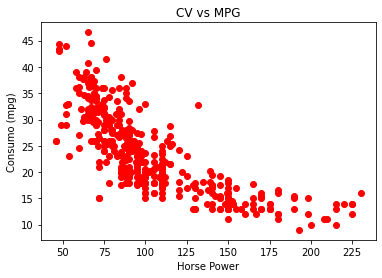

In [45]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

## Modelo de regresión lineal
* mpg = a + b * horsepower

In [46]:
x = data_auto["horsepower"]
y = data_auto["mpg"]

In [ ]:
lm 